# Decision Tree Regression

## Importing the libraries

In [2]:
import pandas as pd
import seaborn as seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp



## Importing the dataset

In [3]:
penguins = seaborn.load_dataset('penguins')

## Data Preprocessing:
Firstly, check the data in the dataset and delete incomplete data points with any feature as ‘NaN’ or ‘Null’.
Then, you should convert features of string type into numerical values.
Lastly, randomly split the whole dataset into train/test with the ratio 70% for training set and 30% for test set.

In [14]:
print("Q2.1.1 Data Preprocessing:")

original_size = penguins.shape[0]
print(f"Number of data points in the whole dataset originally: {original_size}")
penguins_clean = penguins.dropna().copy()
cleaned_size = penguins_clean.shape[0]
print(f"Number of data points in the whole dataset after deleting incomplete data: {cleaned_size}")

# categorical columns
categorical_cols = penguins_clean.select_dtypes(include=['object', 'category']).columns.tolist()
#print(f"Categorical columns: {categorical_cols}") #---> Categorical columns: ['species', 'island', 'sex']

#One-Hot Encoding (if no ordinal relationship)
# penguins_encoded = pd.get_dummies(penguins_clean, columns=categorical_cols, drop_first=True)

# Label Encoding
# Initialize separate LabelEncoders for each categorical column
le_species = LabelEncoder()
le_island = LabelEncoder()
le_sex = LabelEncoder()

# Encode 'species' and store original class names
penguins_clean['species'] = le_species.fit_transform(penguins_clean['species'])
original_classes = le_species.classes_.tolist()  # ['Adelie', 'Chinstrap', 'Gentoo']
print(f"Original class names: {original_classes}")

# Encode other categorical features
penguins_clean['island'] = le_island.fit_transform(penguins_clean['island'])
penguins_clean['sex'] = le_sex.fit_transform(penguins_clean['sex'])

penguins_encoded = penguins_clean


X = penguins_encoded.drop('species', axis=1)
y = penguins_encoded['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
train_size = X_train.shape[0]
test_size = X_test.shape[0]
print(f"Number of data points in the training set after splitting: {train_size}")
print(f"Number of data points in the test set after splitting: {test_size}")


Q2.1.1 Data Preprocessing:
Number of data points in the whole dataset originally: 344
Number of data points in the whole dataset after deleting incomplete data: 333
Original class names: ['Adelie', 'Chinstrap', 'Gentoo']
Number of data points in the training set after splitting: 233
Number of data points in the test set after splitting: 100


##Data Statistics:
Analyze the statistics of each feature across three classes. You
visualize the statistics by plotting a histogram for each feature per class. You should report
6 figures (corresponding to 6 features), each figure contains 3 subfigures (corresponding to 3
classes). For example, in the i-th figure, there should be 3 subfigures, where the first subfigure
is the histogram for the i-th feature in the first class, and the second subfigure is the histogram
for the i-th feature in the second class, etc. Remember to set the title for each subfigure and
each figure, indicating the class name and feature name respectively

Q2.1.2 Data Statistics:


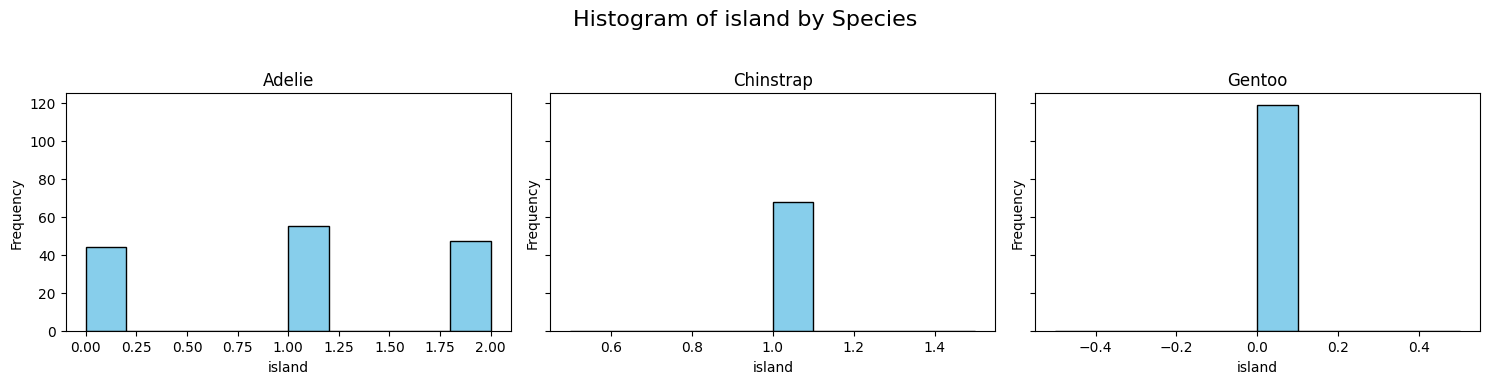

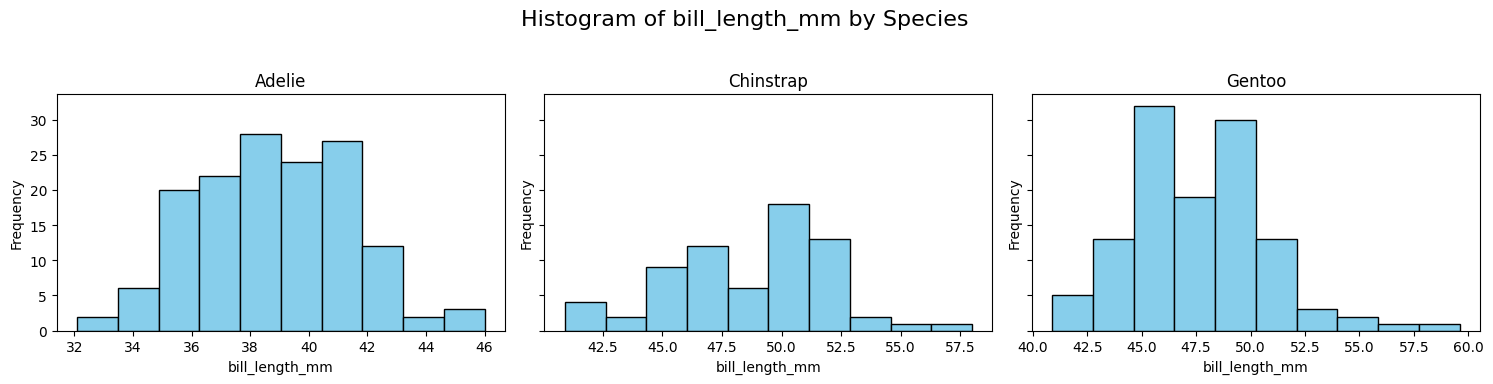

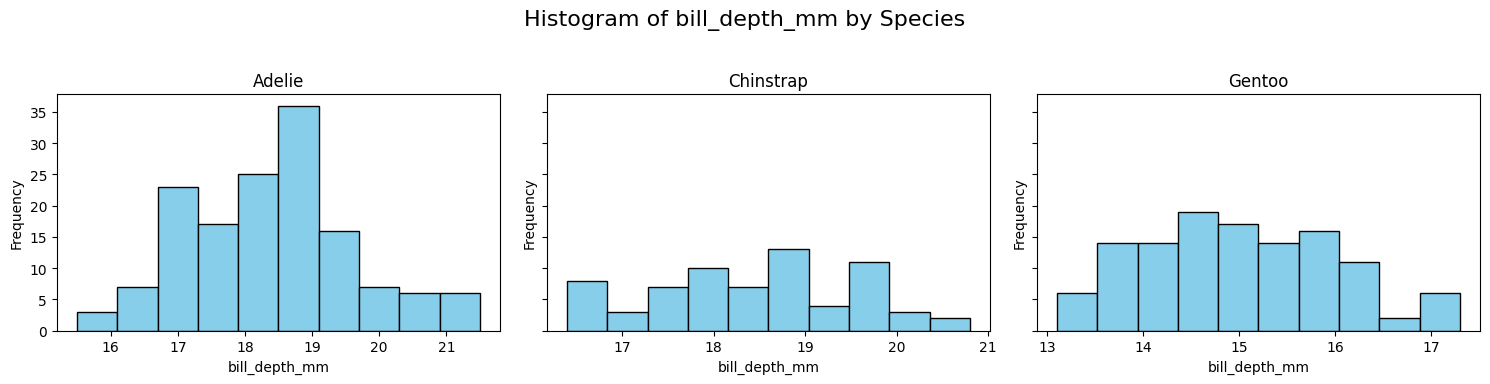

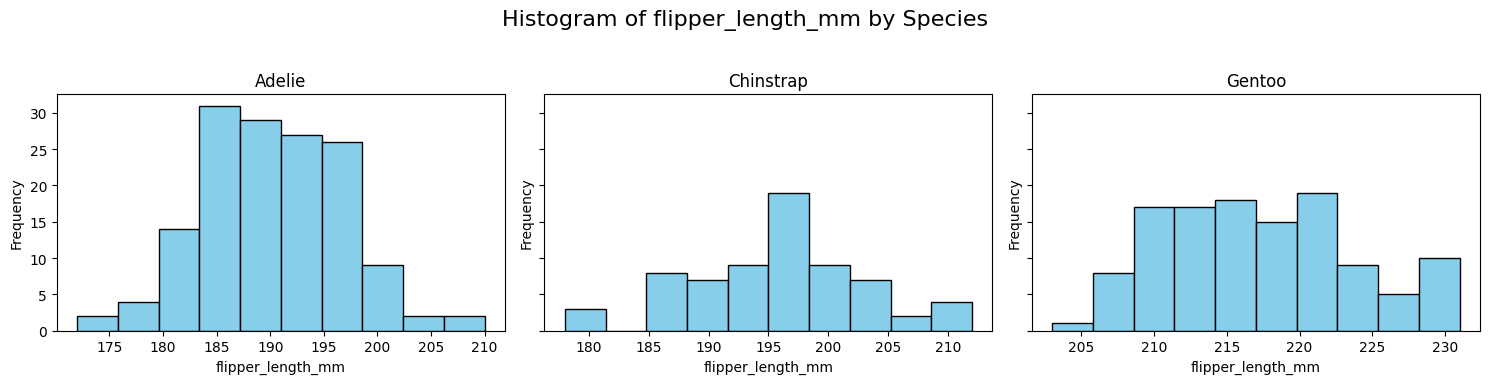

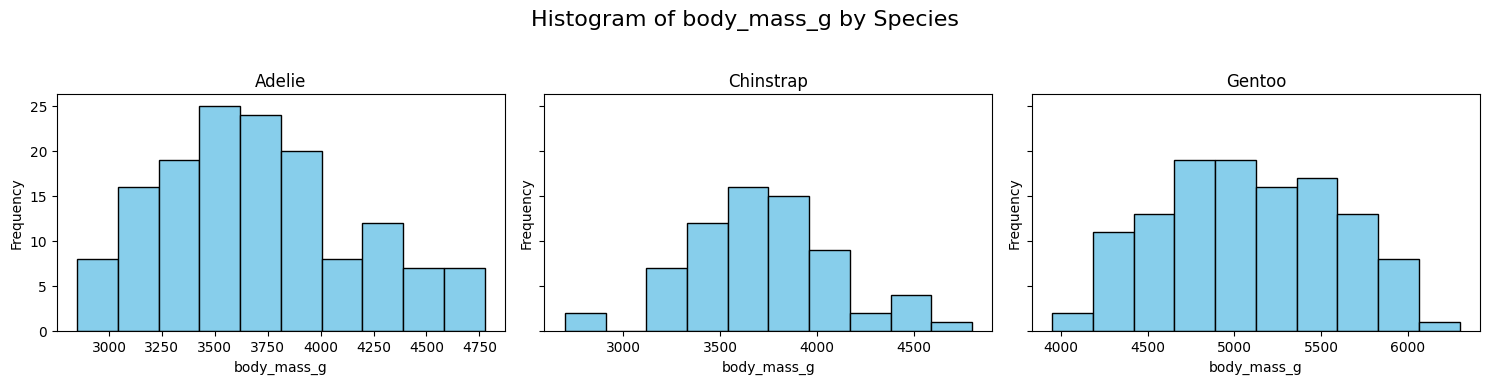

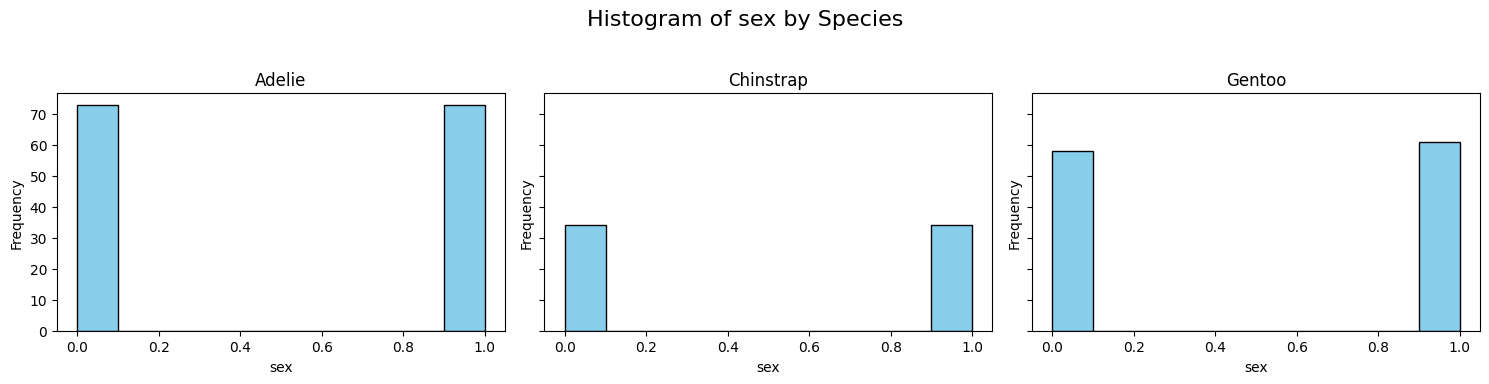

In [5]:
print("Q2.1.2 Data Statistics:")

features = X.columns.tolist()
# classes = y.unique()
classes = le_species.transform(original_classes)  # Convert species names to their encoded labels
# classes = original_classes
# print(f"Features: {features}")
# print(f"Classes: {original_classes}")

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    # plt.subplots(1, 3, ...): Creates a figure with 1 row and 3 columns of subplots. Each subplot will represent a species.
    # sharey=True: All subplots share the same y-axis scale for easier comparison.
    fig.suptitle(f'Histogram of {feature} by Species', fontsize=16)

    for idx, spec in enumerate(original_classes):
        species = le_species.transform([spec])[0]  # 0,1,2 ---> ['Adelie', 'Chinstrap', 'Gentoo'] for histogram
        subset = penguins_clean[penguins_clean['species'] == species] #Filters the DataFrame for the current species.
        axes[idx].hist(subset[feature], bins=10, color='skyblue', edgecolor='black')
        axes[idx].set_title(f'{spec}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"{feature}_histograms.png")
    plt.show()


##Decision Tree:
Solve the above problem using the decision tree method; report
the train/test accuracy with respect to three different maximum depths, and three different
least node sizes; plot each learned tree.

Q2.1.3 Decision Tree:
1. Results with maximum depth as 3 and least node size as 2:
   Training accuracy: 0.98, Test accuracy: 0.95


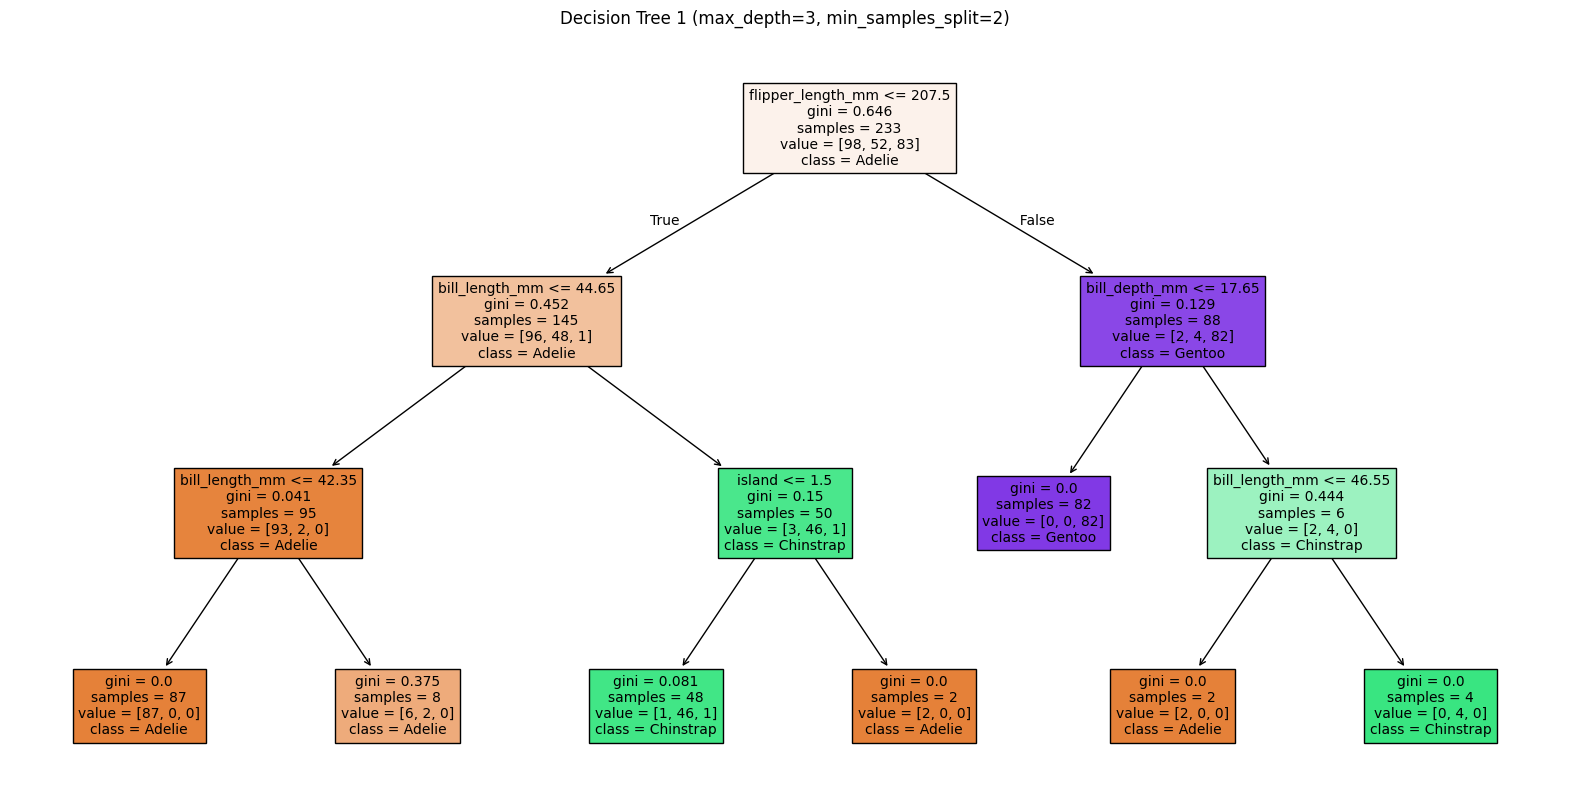

2. Results with maximum depth as 3 and least node size as 5:
   Training accuracy: 0.98, Test accuracy: 0.95


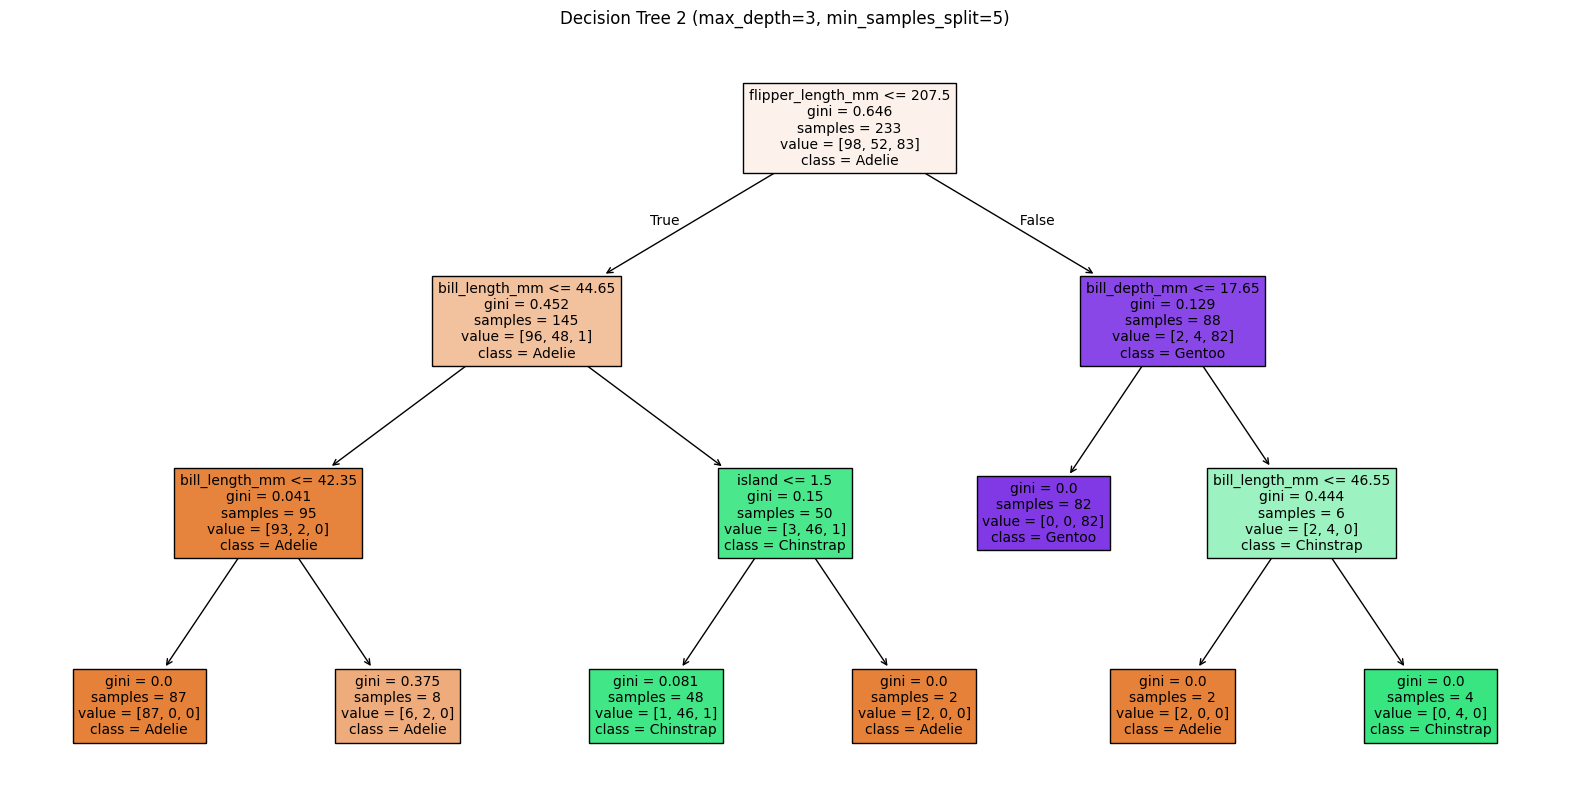

3. Results with maximum depth as 3 and least node size as 10:
   Training accuracy: 0.97, Test accuracy: 0.95


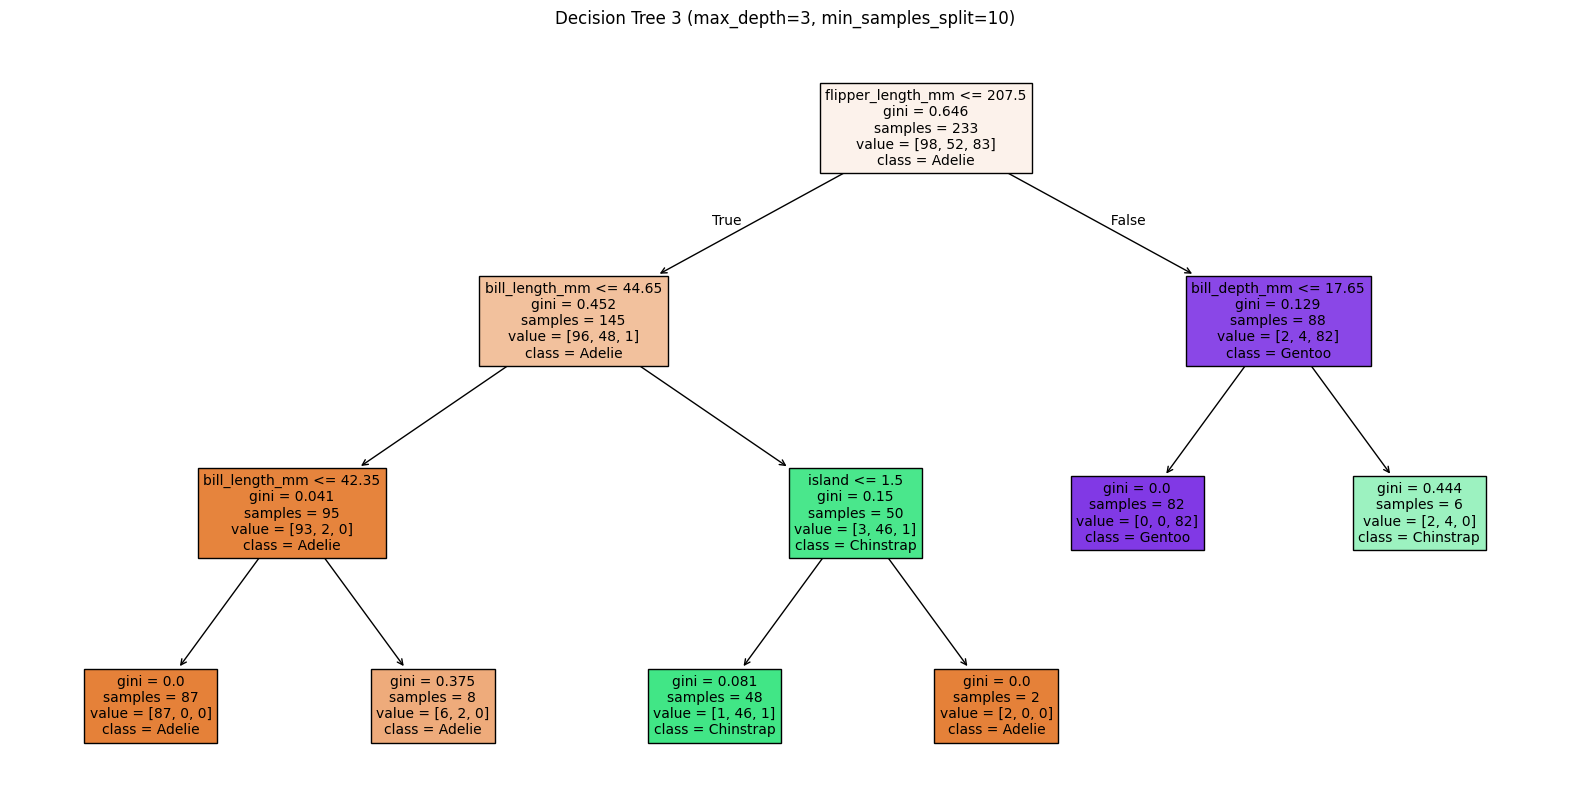

4. Results with maximum depth as 5 and least node size as 2:
   Training accuracy: 1.00, Test accuracy: 0.96


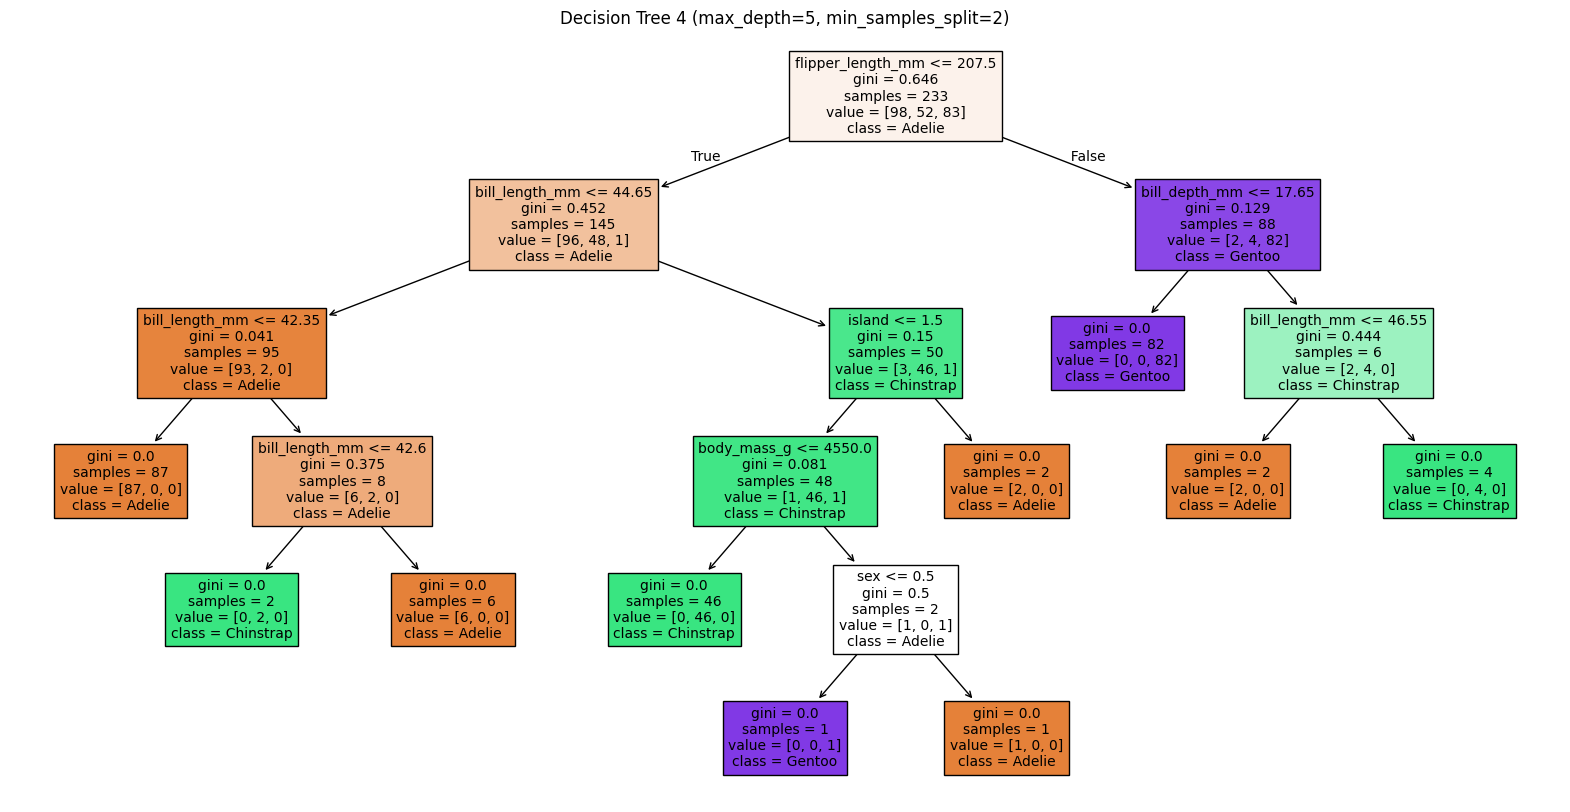

5. Results with maximum depth as 5 and least node size as 5:
   Training accuracy: 1.00, Test accuracy: 0.95


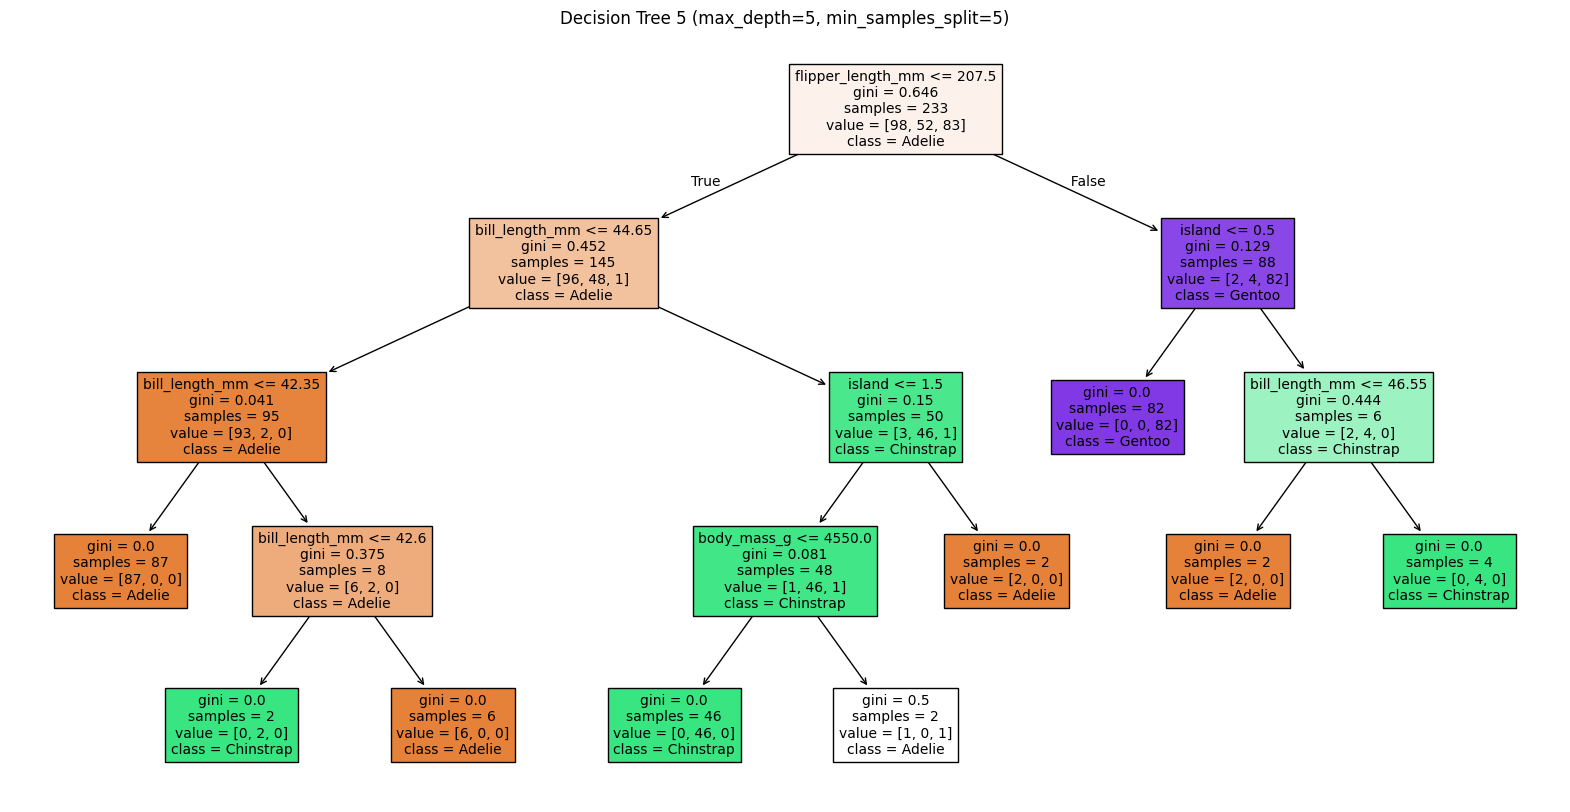

6. Results with maximum depth as 5 and least node size as 10:
   Training accuracy: 0.98, Test accuracy: 0.95


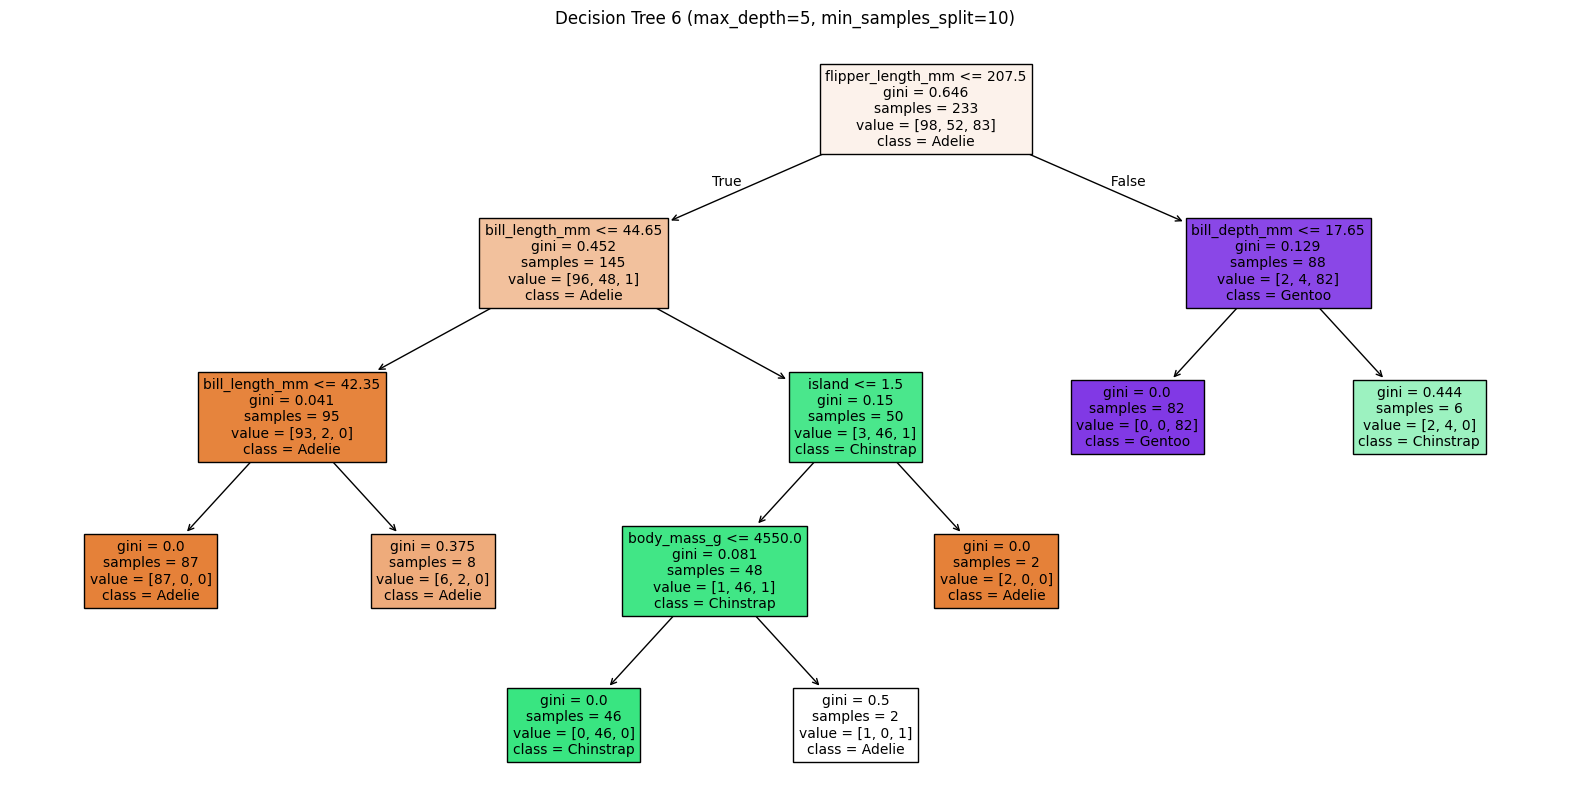

7. Results with maximum depth as 7 and least node size as 2:
   Training accuracy: 1.00, Test accuracy: 0.96


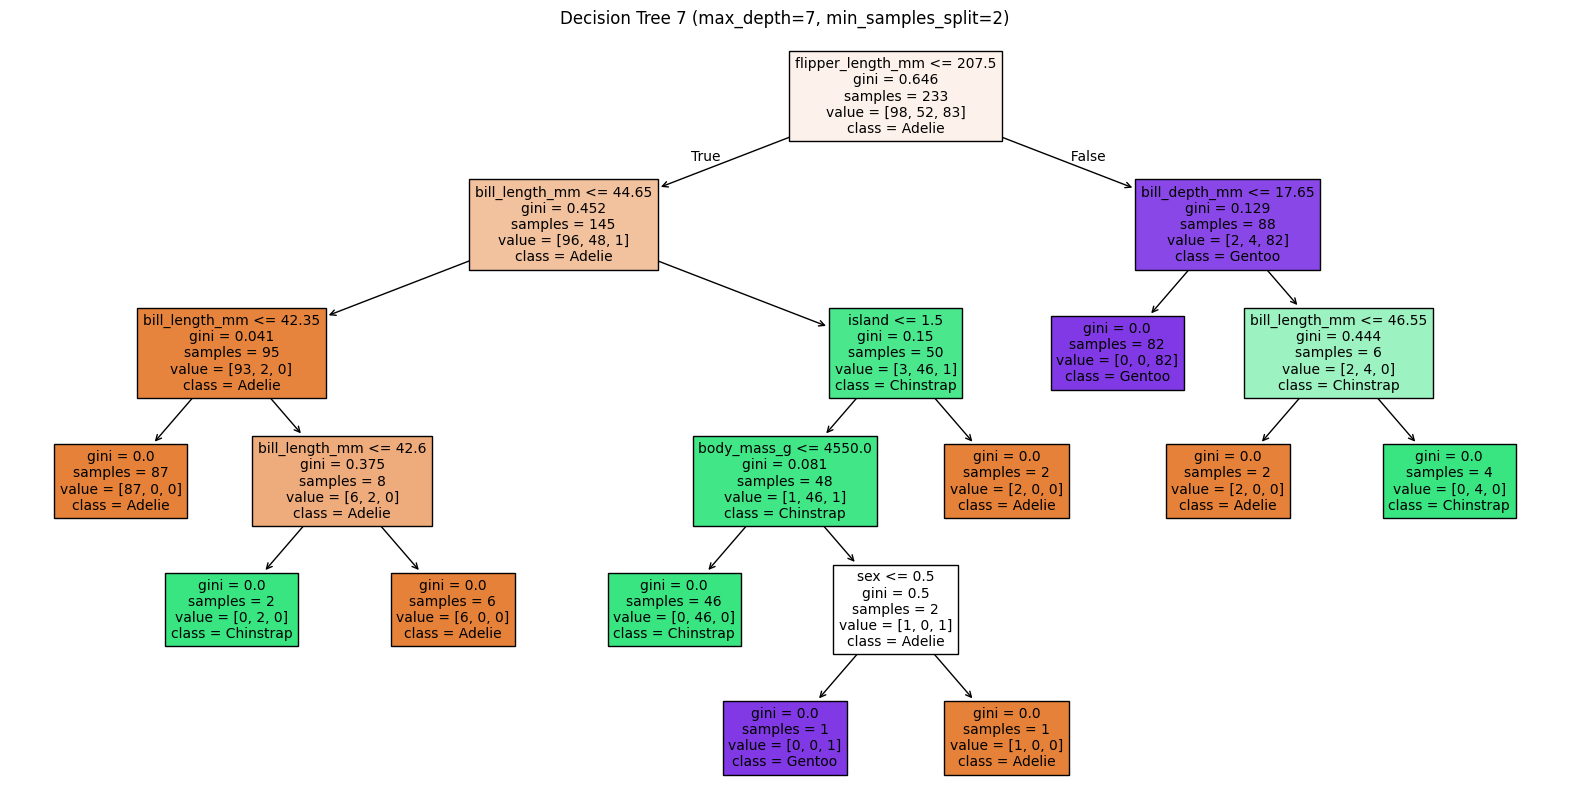

8. Results with maximum depth as 7 and least node size as 5:
   Training accuracy: 1.00, Test accuracy: 0.95


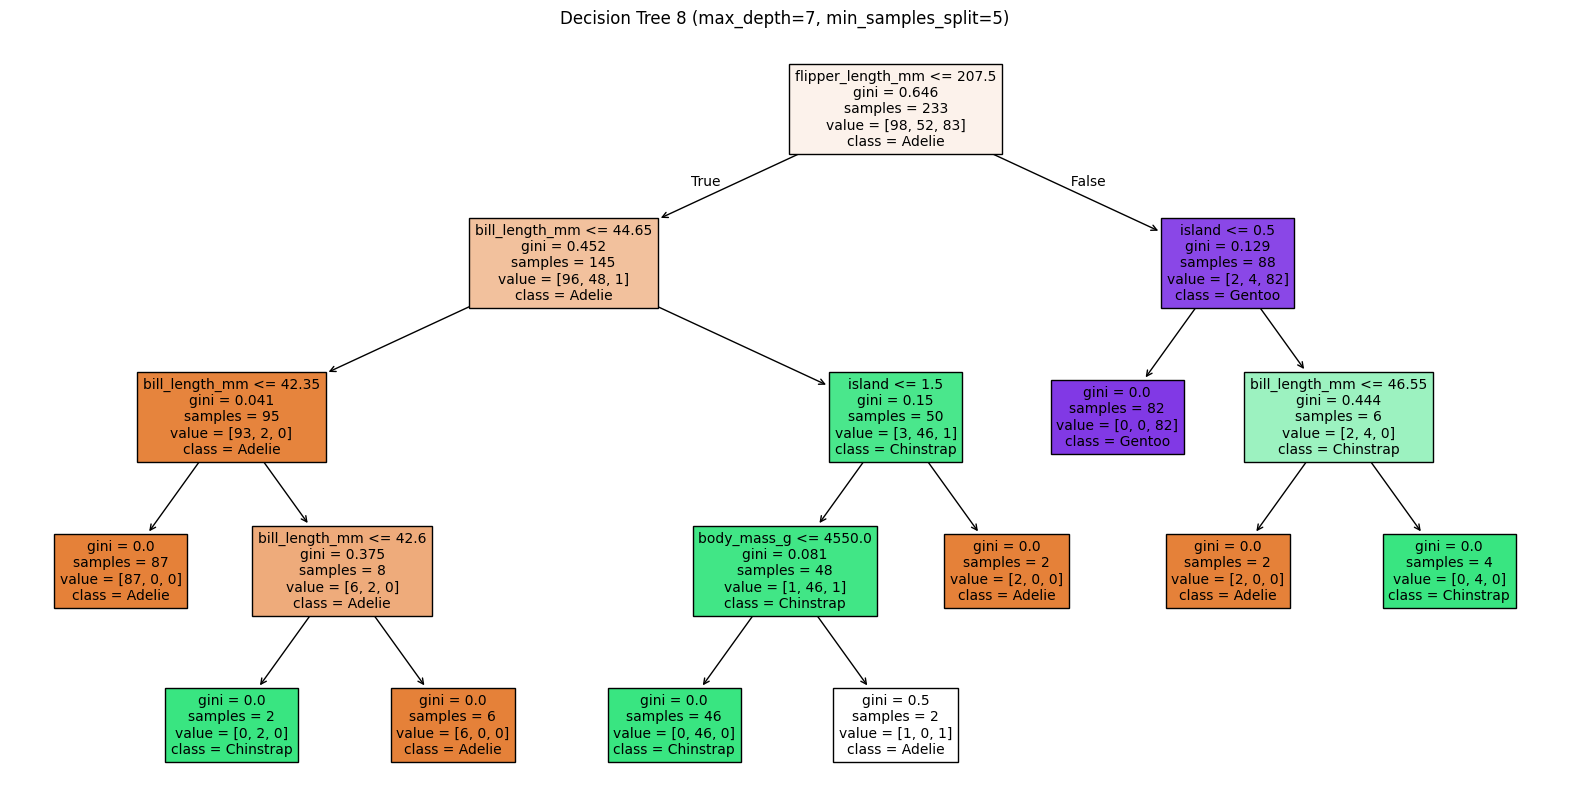

9. Results with maximum depth as 7 and least node size as 10:
   Training accuracy: 0.98, Test accuracy: 0.95


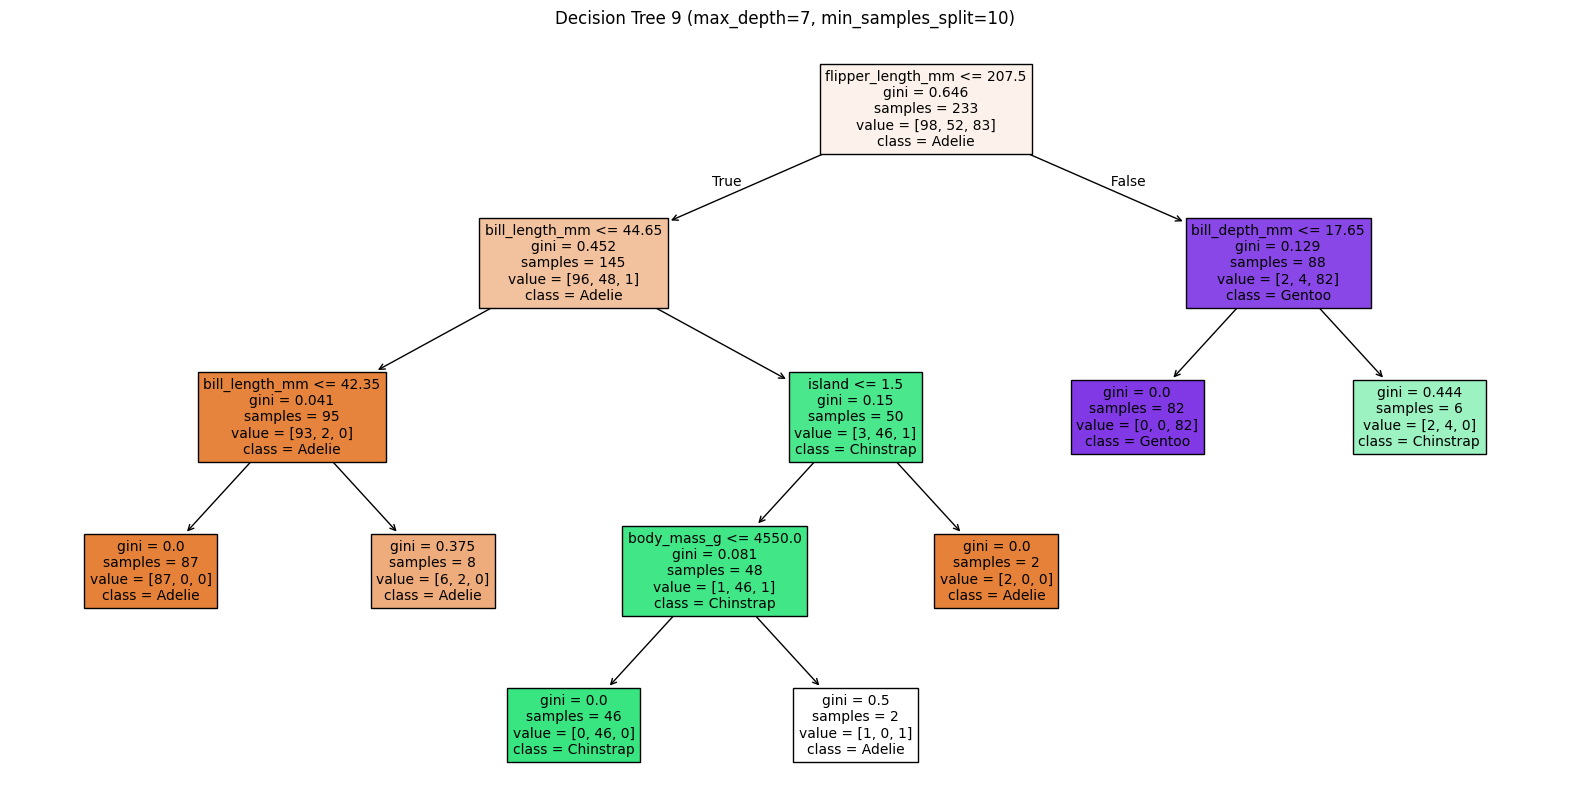

In [6]:
print("Q2.1.3 Decision Tree:")

max_depths = [3, 5, 7]
min_samples_splits = [2, 5, 10]
results = []
model_counter = 1  # Initialize a counter for numbering

for depth in max_depths:
    for min_split in min_samples_splits:
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split, random_state=42)
        clf.fit(X_train, y_train)

        # Predictions
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Store results
        result = {
            'max_depth': depth,
            'min_samples_split': min_split,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'model': clf
        }
        results.append(result)

        # Print the results first
        print(f"{model_counter}. Results with maximum depth as {depth} and least node size as {min_split}:")
        print(f"   Training accuracy: {train_acc:.2f}, Test accuracy: {test_acc:.2f}")

        # Visualization
        plt.figure(figsize=(20,10))
        plot_tree(clf, feature_names=X.columns, class_names=original_classes, filled=True, fontsize=10)
        plt.title(f"Decision Tree {model_counter} (max_depth={depth}, min_samples_split={min_split})")
        plt.savefig(f"DecisionTree_depth{depth}_minsplit{min_split}.png")
        plt.show()

        model_counter += 1  # Increment the counter

##Bagging of Trees:
Solve the above problem using the bagging method, with the
decision tree as the base learner; report the train/test accuracy with respect to three different
maximum depths, and three different numbers of trees.

In [7]:
max_depths = [3, 5, 7]  # Same as before
n_estimators = [10, 50, 100]  # Example values for n1, n2, n3

results = []

for depth in max_depths:
    for n_trees in n_estimators:
        base_estimator = DecisionTreeClassifier(max_depth=depth, random_state=42)
        bagging = BaggingClassifier(estimator =base_estimator, n_estimators=n_trees,random_state=42)
        bagging.fit(X_train, y_train)

        # Predictions
        y_train_pred = bagging.predict(X_train)
        y_test_pred = bagging.predict(X_test)

        # Calculate accuracies
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Store results
        result = {
            'max_depth': depth,
            'n_estimators': n_trees,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        }
        results.append(result)

print("Q2.1.4 Bagging of Trees:")
for idx, res in enumerate(results, 1):
    print(f"{idx}. Results with maximum depth as {res['max_depth']} and number of trees as {res['n_estimators']}: ")
    print(f"training accuracy: {res['train_accuracy']:.2f}, test accuracy: {res['test_accuracy']:.2f}")


Q2.1.4 Bagging of Trees:
1. Results with maximum depth as 3 and number of trees as 10: 
training accuracy: 0.99, test accuracy: 0.96
2. Results with maximum depth as 3 and number of trees as 50: 
training accuracy: 0.99, test accuracy: 0.96
3. Results with maximum depth as 3 and number of trees as 100: 
training accuracy: 0.99, test accuracy: 0.96
4. Results with maximum depth as 5 and number of trees as 10: 
training accuracy: 1.00, test accuracy: 0.98
5. Results with maximum depth as 5 and number of trees as 50: 
training accuracy: 1.00, test accuracy: 0.98
6. Results with maximum depth as 5 and number of trees as 100: 
training accuracy: 1.00, test accuracy: 0.98
7. Results with maximum depth as 7 and number of trees as 10: 
training accuracy: 1.00, test accuracy: 0.98
8. Results with maximum depth as 7 and number of trees as 50: 
training accuracy: 1.00, test accuracy: 0.98
9. Results with maximum depth as 7 and number of trees as 100: 
training accuracy: 1.00, test accuracy: 0.98


##Random Forests:
Solve the above problem using the random forest method,
with the decision tree as the base learner; report the train/test accuracy with respect to three
different maximum depths, and three different numbers of trees.

In [8]:
print("Q2.1.5 Random Forests:")

max_depths = [3, 5, 7]  # Same as before
n_estimators = [10, 50, 100]  # Same as before

results = []

for depth in max_depths:
    for n_trees in n_estimators:
        rf = RandomForestClassifier(
            max_depth=depth,
            n_estimators=n_trees,
            random_state=42
        )
        rf.fit(X_train, y_train)

        # Predictions
        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)

        # Calculate accuracies
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Store results
        result = {
            'max_depth': depth,
            'n_estimators': n_trees,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        }
        results.append(result)

for idx, res in enumerate(results, 1):
    print(f"{idx}. Results with maximum depth as {res['max_depth']} and number of trees as {res['n_estimators']}: ")
    print(f"training accuracy: {res['train_accuracy']:.2f}, test accuracy: {res['test_accuracy']:.2f}")

Q2.1.5 Random Forests:
1. Results with maximum depth as 3 and number of trees as 10: 
training accuracy: 0.99, test accuracy: 0.96
2. Results with maximum depth as 3 and number of trees as 50: 
training accuracy: 0.98, test accuracy: 0.96
3. Results with maximum depth as 3 and number of trees as 100: 
training accuracy: 0.99, test accuracy: 0.96
4. Results with maximum depth as 5 and number of trees as 10: 
training accuracy: 1.00, test accuracy: 0.97
5. Results with maximum depth as 5 and number of trees as 50: 
training accuracy: 1.00, test accuracy: 0.98
6. Results with maximum depth as 5 and number of trees as 100: 
training accuracy: 1.00, test accuracy: 0.98
7. Results with maximum depth as 7 and number of trees as 10: 
training accuracy: 1.00, test accuracy: 0.99
8. Results with maximum depth as 7 and number of trees as 50: 
training accuracy: 1.00, test accuracy: 0.98
9. Results with maximum depth as 7 and number of trees as 100: 
training accuracy: 1.00, test accuracy: 0.98


## Relationship of Bias/Variance with respect to Number of Trees in Random Forests:
Plot the curve of bias2 with respect to different numbers of trees in
random forests, e.g., tree = 10, 20, . . . , 100. Then, describe the relationship between bias2
and different numbers of trees; repeat the procedure for variance. You can use the function
from https://rasbt.github.io/mlxtend/user guide/evaluate/bias variance decomp/ to get the
results

Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests
Bias² vs. Number of Trees


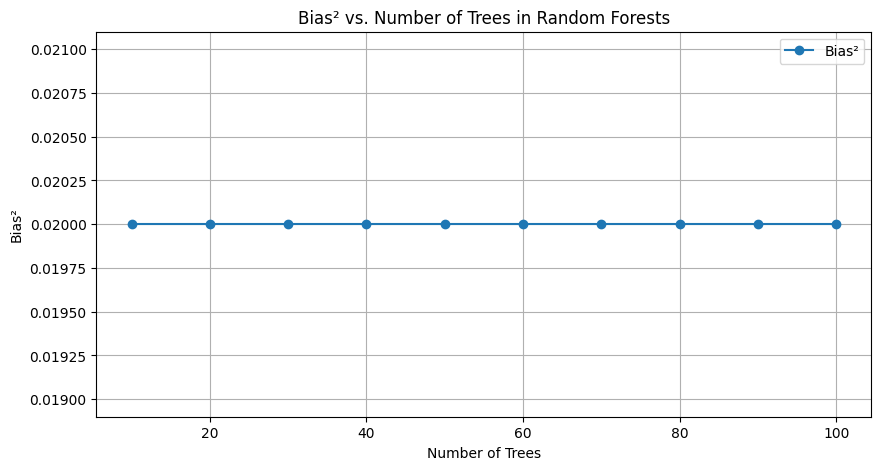

As the number of trees increases, Bias^2 either remains relatively constant or decreases slightly.
Variance vs. Number of Trees


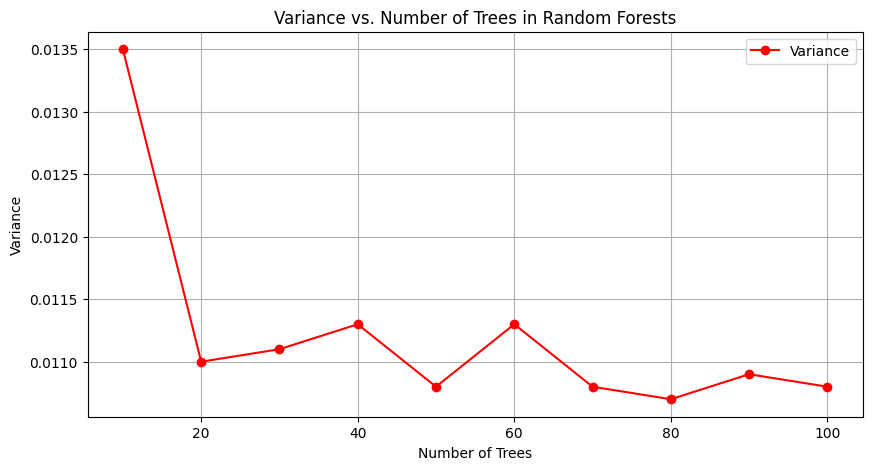

As the number of trees increases, Variance decreases significantly. This is because averaging over more trees reduces the model's sensitivity to fluctuations in the training data, thus stabilizing the predictions.


In [9]:
print("Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests")

n_trees_list = list(range(10, 110, 10))  # 10, 20, , 100
bias_list = []
variance_list = []

for n_trees in n_trees_list:
    rf = RandomForestClassifier(
        max_depth=7,
        n_estimators=n_trees,
        random_state=42
    )

    # bias_variance_decomp
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        rf,
        X_train.values, y_train.values,
        X_test.values, y_test.values,
        loss='0-1_loss',
        random_seed=42,
        num_rounds=100
    )

    bias_list.append(avg_bias)
    variance_list.append(avg_var)

# Bias² vs. Number of Trees
print("Bias² vs. Number of Trees")
plt.figure(figsize=(10, 5))
plt.plot(n_trees_list, bias_list, marker='o', label='Bias²')
plt.title('Bias² vs. Number of Trees in Random Forests')
plt.xlabel('Number of Trees')
plt.ylabel('Bias²')
plt.legend()
plt.grid(True)
plt.savefig("Bias2_vs_Trees.png")
plt.show()
print("As the number of trees increases, Bias^2 either remains relatively constant or decreases slightly.")

# Variance vs. Number of Trees
print("Variance vs. Number of Trees")
plt.figure(figsize=(10, 5))
plt.plot(n_trees_list, variance_list, marker='o', color='red', label='Variance')
plt.title('Variance vs. Number of Trees in Random Forests')
plt.xlabel('Number of Trees')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.savefig("Variance_vs_Trees.png")
plt.show()
print("As the number of trees increases, Variance decreases significantly. This is because averaging over more trees reduces the model's sensitivity to fluctuations in the training data, thus stabilizing the predictions.")
